In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

In [2]:
# Import Requests Library
import requests

# Import the API key
from config import weather_api_key

# Import the time library and datetime module drom the dateime library
import time
from datetime import datetime

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | porto santo
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | grindavik
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | bandarbeyla
Processing Record 6 of Set 1 | vardo
Processing Record 7 of Set 1 | staunton
Processing Record 8 of Set 1 | saldanha
Processing Record 9 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 10 of Set 1 | biltine
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | ariquemes
Processing Record 14 of Set 1 | skelleftea
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | manturovo
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | hi

Processing Record 39 of Set 4 | port talbot
Processing Record 40 of Set 4 | fez
Processing Record 41 of Set 4 | quatre cocos
Processing Record 42 of Set 4 | bengkulu
Processing Record 43 of Set 4 | dibaya
City not found. Skipping...
Processing Record 44 of Set 4 | jiblah
Processing Record 45 of Set 4 | wahran
City not found. Skipping...
Processing Record 46 of Set 4 | gao
Processing Record 47 of Set 4 | gornopravdinsk
Processing Record 48 of Set 4 | ostrovnoy
Processing Record 49 of Set 4 | coquimbo
Processing Record 50 of Set 4 | aksarka
Processing Record 1 of Set 5 | pontes e lacerda
Processing Record 2 of Set 5 | port blair
Processing Record 3 of Set 5 | nanortalik
Processing Record 4 of Set 5 | ponta delgada
Processing Record 5 of Set 5 | westport
Processing Record 6 of Set 5 | mocuba
Processing Record 7 of Set 5 | felnac
Processing Record 8 of Set 5 | katiola
Processing Record 9 of Set 5 | iguape
Processing Record 10 of Set 5 | bandar-e torkaman
City not found. Skipping...
Process

Processing Record 23 of Set 8 | copiapo
Processing Record 24 of Set 8 | ewo
Processing Record 25 of Set 8 | raga
Processing Record 26 of Set 8 | bara
Processing Record 27 of Set 8 | skjaerhollen
City not found. Skipping...
Processing Record 28 of Set 8 | portree
Processing Record 29 of Set 8 | dolores
Processing Record 30 of Set 8 | tabuk
Processing Record 31 of Set 8 | abha
Processing Record 32 of Set 8 | chimbote
Processing Record 33 of Set 8 | darnah
Processing Record 34 of Set 8 | jever
Processing Record 35 of Set 8 | vincennes
Processing Record 36 of Set 8 | bangassou
Processing Record 37 of Set 8 | buraydah
Processing Record 38 of Set 8 | carutapera
Processing Record 39 of Set 8 | hirna
Processing Record 40 of Set 8 | rundu
Processing Record 41 of Set 8 | marcona
City not found. Skipping...
Processing Record 42 of Set 8 | codrington
Processing Record 43 of Set 8 | stornoway
Processing Record 44 of Set 8 | antalaha
Processing Record 45 of Set 8 | kanashevo
Processing Record 46 of 

Processing Record 12 of Set 12 | esil
Processing Record 13 of Set 12 | kazanlak
Processing Record 14 of Set 12 | rayagada
Processing Record 15 of Set 12 | olafsvik
Processing Record 16 of Set 12 | san rafael del sur
Processing Record 17 of Set 12 | achisay
City not found. Skipping...
Processing Record 18 of Set 12 | gidole
Processing Record 19 of Set 12 | calabozo
Processing Record 20 of Set 12 | bahawalpur
Processing Record 21 of Set 12 | ibra
Processing Record 22 of Set 12 | kuche
City not found. Skipping...
Processing Record 23 of Set 12 | thompson
Processing Record 24 of Set 12 | yermolayevo
Processing Record 25 of Set 12 | kutum
Processing Record 26 of Set 12 | abonnema
Processing Record 27 of Set 12 | fenoarivo
Processing Record 28 of Set 12 | harderwijk
Processing Record 29 of Set 12 | kefalos
Processing Record 30 of Set 12 | walvis bay
Processing Record 31 of Set 12 | puerto quijarro
Processing Record 32 of Set 12 | jalingo
Processing Record 33 of Set 12 | shubarshi
Processing 

In [9]:
len(city_data)

555

In [10]:
# Convert the array of dictionaries into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Porto Santo,33.0720,-16.3415,66.58,59,20,16.11,PT,2022-05-08 17:08:55
1,Saint George,37.1041,-113.5841,77.79,11,0,5.75,US,2022-05-08 17:08:55
2,Grindavik,63.8424,-22.4338,54.07,76,75,20.71,IS,2022-05-08 17:08:56
3,East London,-33.0153,27.9116,64.26,73,85,15.82,ZA,2022-05-08 17:08:56
4,Bandarbeyla,9.4942,50.8122,83.28,82,1,14.12,SO,2022-05-08 17:08:57
5,Vardo,70.3705,31.1107,31.98,80,40,9.22,NO,2022-05-08 17:08:57
6,Staunton,38.1496,-79.0717,46.96,81,100,13.80,US,2022-05-08 17:08:58
7,Saldanha,-33.0117,17.9442,57.54,78,21,7.90,ZA,2022-05-08 17:08:58
8,Biltine,14.5333,20.9167,99.52,6,1,7.72,TD,2022-05-08 17:08:59
9,Saint-Philippe,-21.3585,55.7679,72.99,83,43,8.32,RE,2022-05-08 17:08:59


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Porto Santo,PT,2022-05-08 17:08:55,33.0720,-16.3415,66.58,59,20,16.11
1,Saint George,US,2022-05-08 17:08:55,37.1041,-113.5841,77.79,11,0,5.75
2,Grindavik,IS,2022-05-08 17:08:56,63.8424,-22.4338,54.07,76,75,20.71
3,East London,ZA,2022-05-08 17:08:56,-33.0153,27.9116,64.26,73,85,15.82
4,Bandarbeyla,SO,2022-05-08 17:08:57,9.4942,50.8122,83.28,82,1,14.12
5,Vardo,NO,2022-05-08 17:08:57,70.3705,31.1107,31.98,80,40,9.22
6,Staunton,US,2022-05-08 17:08:58,38.1496,-79.0717,46.96,81,100,13.80
7,Saldanha,ZA,2022-05-08 17:08:58,-33.0117,17.9442,57.54,78,21,7.90
8,Biltine,TD,2022-05-08 17:08:59,14.5333,20.9167,99.52,6,1,7.72
9,Saint-Philippe,RE,2022-05-08 17:08:59,-21.3585,55.7679,72.99,83,43,8.32


In [14]:
# Create the output file (csv)
output_data_file = "weather_data/cities.csv"

# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

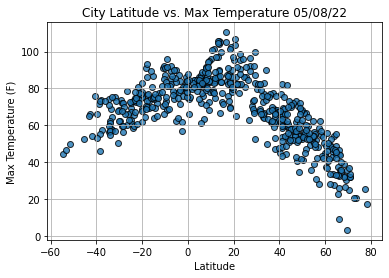

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

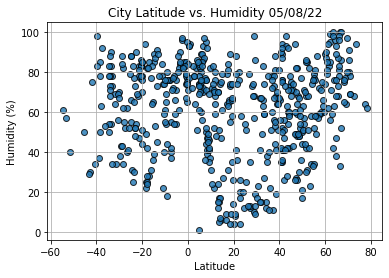

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

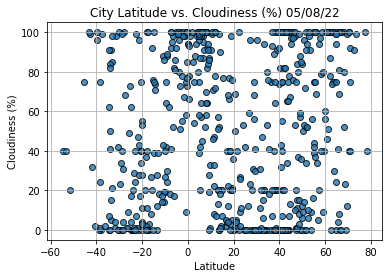

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

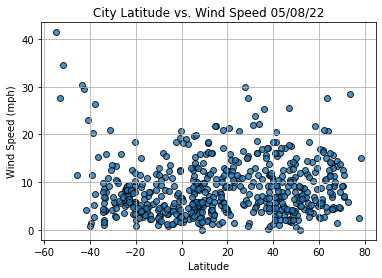

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Porto Santo,PT,2022-05-08 17:08:55,33.0720,-16.3415,66.58,59,20,16.11
1,Saint George,US,2022-05-08 17:08:55,37.1041,-113.5841,77.79,11,0,5.75
2,Grindavik,IS,2022-05-08 17:08:56,63.8424,-22.4338,54.07,76,75,20.71
4,Bandarbeyla,SO,2022-05-08 17:08:57,9.4942,50.8122,83.28,82,1,14.12
5,Vardo,NO,2022-05-08 17:08:57,70.3705,31.1107,31.98,80,40,9.22


In [23]:
# Create Northern and South Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

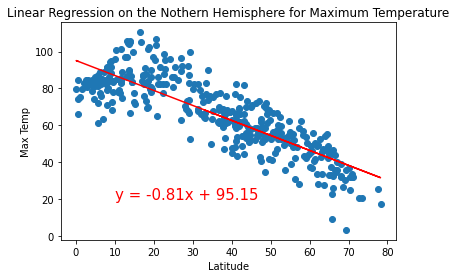

In [27]:
# Linear Regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere for Maximum Temperature', 'Max Temp', (10,20))

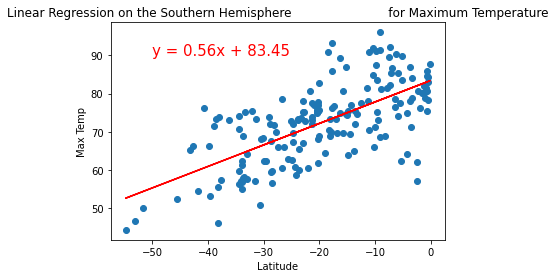

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

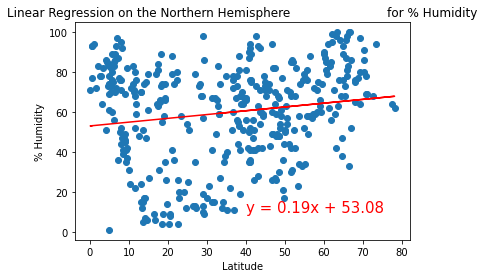

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

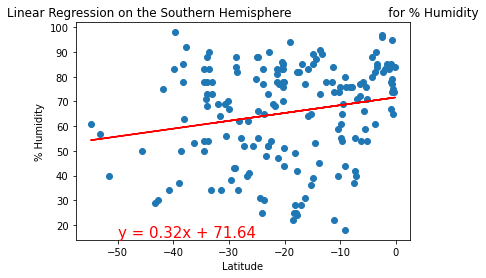

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

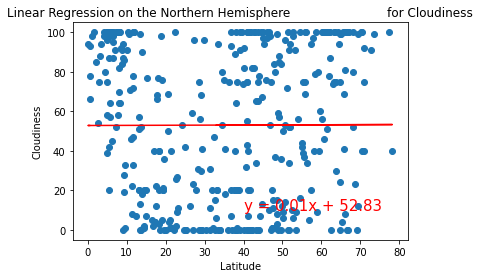

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

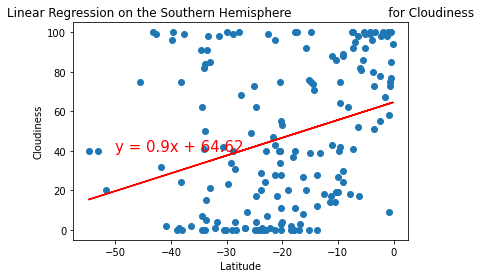

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-50,40))

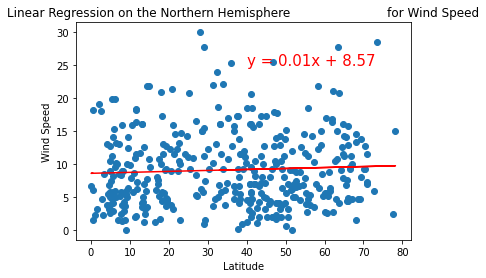

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

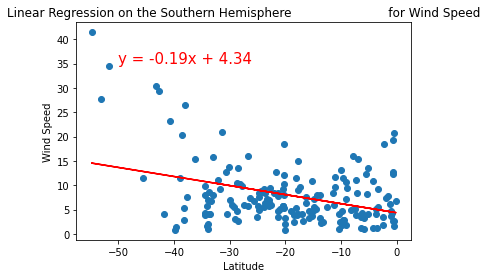

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))